<a href="https://colab.research.google.com/github/abkimc/CV-course-test-prepration/blob/main/Image_processing_lecture_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

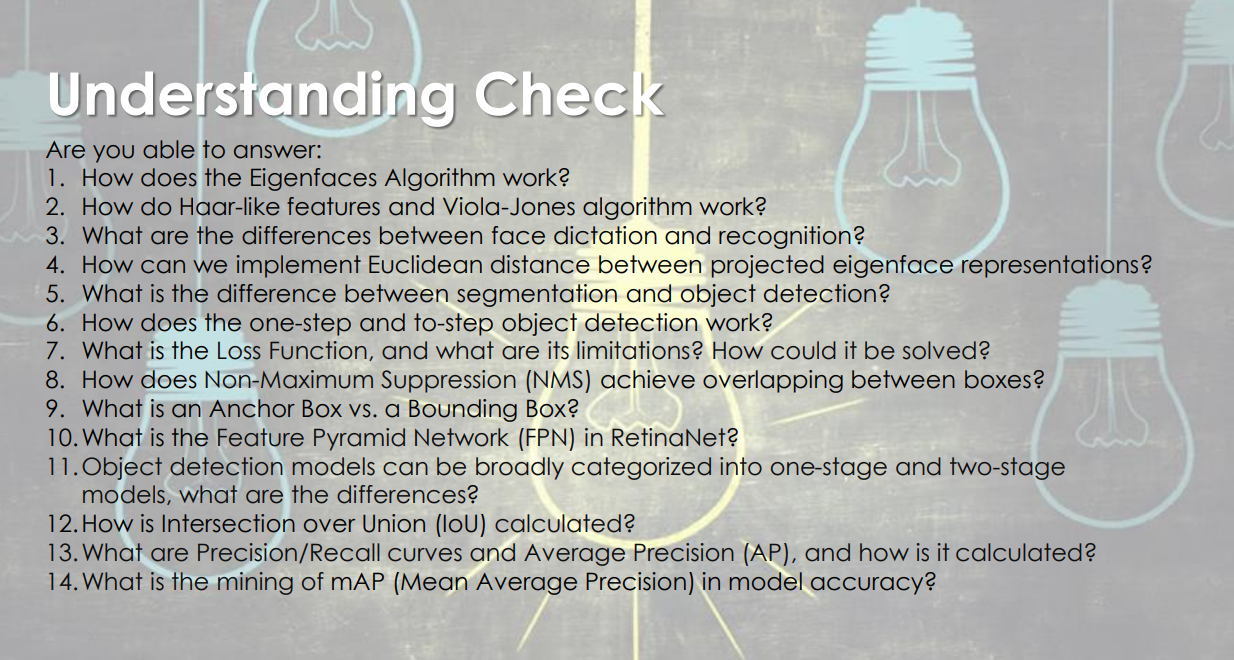

In [ ]:
# 1. How does the Eigenfaces Algorithm work?
"""
The Eigenfaces algorithm projects face images into a lowerdimensional "face space" using PCA.
• Each face image can be approximated as a linear combination of the "eigenfaces” the principal components derived from a dataset of faces.
• Recognition is performed by comparing the reduced-dimensional representation of an unknown face to those of known faces.
Assume that most face images lie on a low-dimensional subspace
determined by the first k (k<directions of maximum variance)
• Use Principal Component Analysis (PCA) to determine the vectors or “eigenfaces” that span that subspace
• Represent all face images in the dataset as linear combinations of eigenfaces

1. Compute the mean of each column in the matrix, which gives us the average pixel intensity value for every (x, y) ordinate in the image dataset.
2. Subtract the mean µ from each column — this is called mean cantering the data and is a required step when performing PCA.
3. Now that our matrix M has been mean-centered, compute the covariance matrix.
4. Perform an eigenvalue decomposition on the covariance matrix to get the eigenvalues λ and eigenvectors.
5. Sort λ largest to smallest.
6. Take the top N eigenvectors with the largest corresponding eigenvalue magnitude.
7. Transform the input data by projecting (i.e., taking the dot product) it onto the space
created by the top N eigenvectors — these eigenvectors are called our eigenfaces.
"""


Loading Olivetti faces dataset...
downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
Dataset loaded successfully. Shape: (400, 4096)

Displaying sample faces from the dataset:


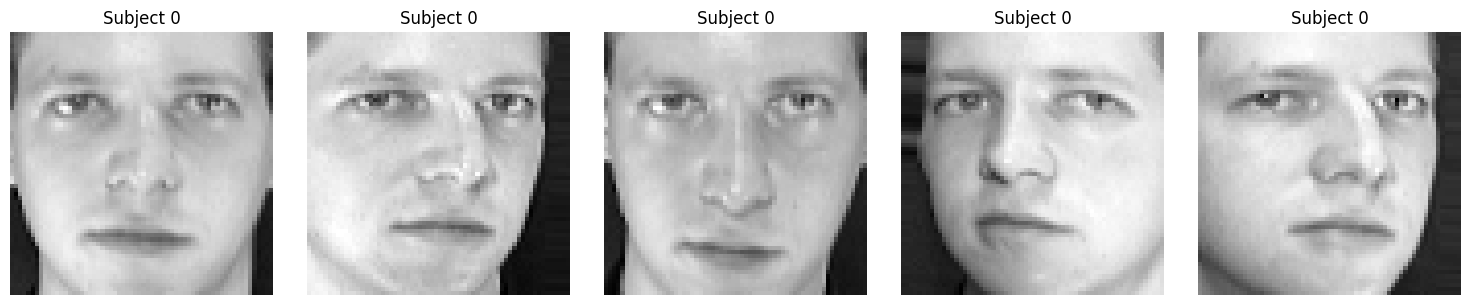


Training Eigenfaces with 50 components...

Plotting first 5 eigenfaces...


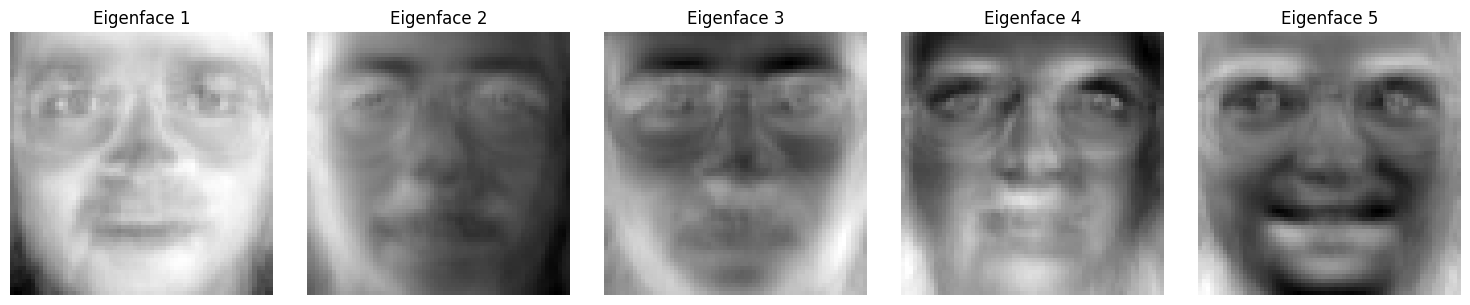


Training KNN classifier...

Making predictions and evaluating results...

Training Set Results:


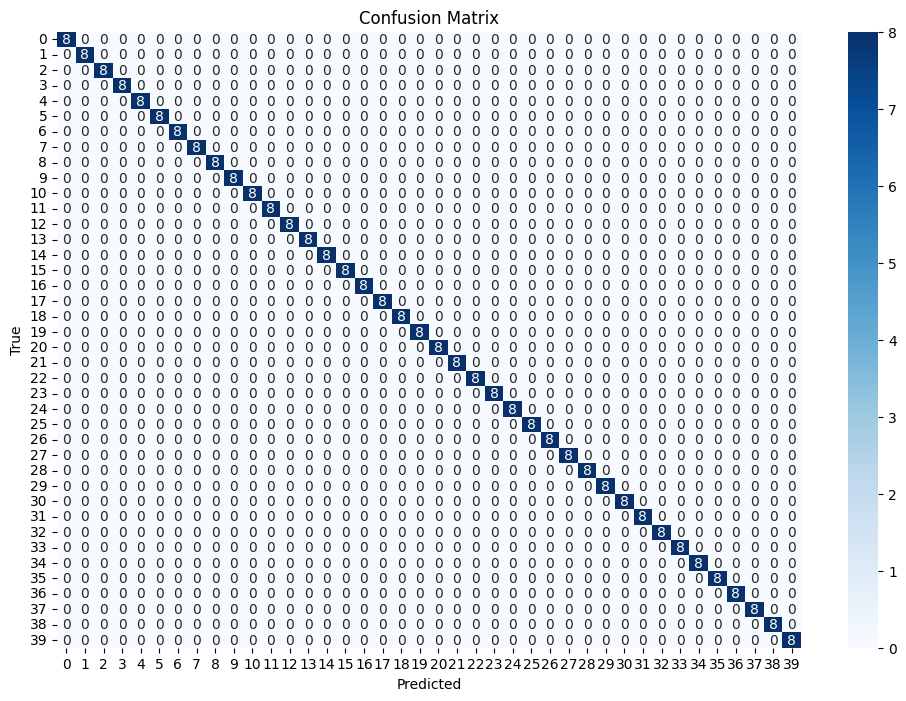


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00         8
          16       1.00      1.00      1.00         8
   

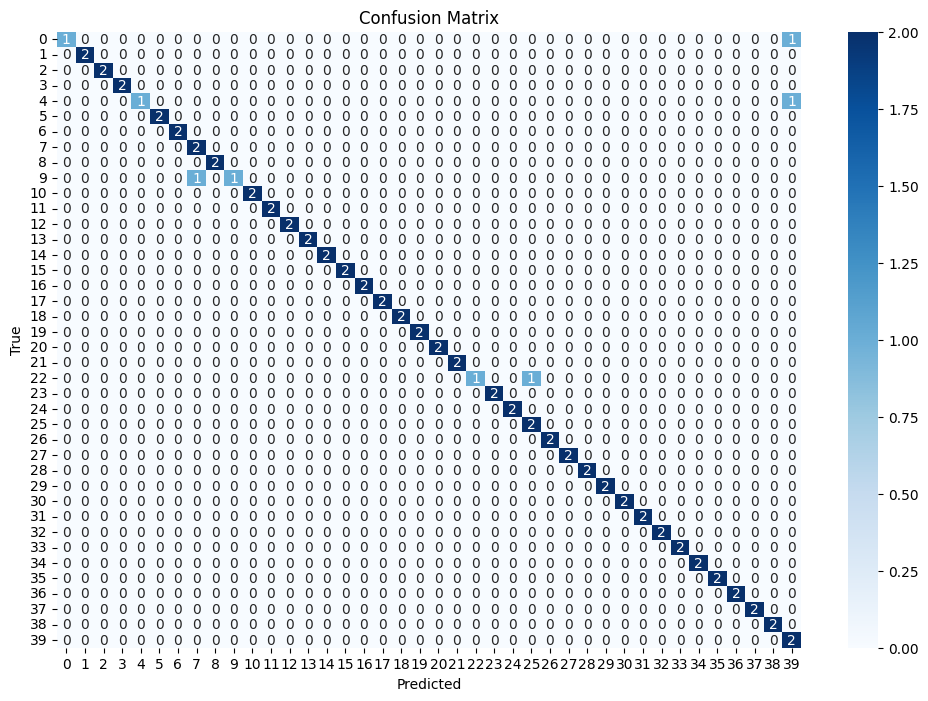


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       0.67      1.00      0.80         2
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
   

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_olivetti_faces

def load_olivetti_faces():
    """Load Olivetti faces dataset from scikit-learn"""
    print("Loading Olivetti faces dataset...")
    dataset = fetch_olivetti_faces()
    return dataset.data, dataset.target, (64, 64)  # Images are 64x64

def train_eigenfaces(X_train, n_components=150):
    """Train Eigenfaces model"""
    # Step 1 & 2: Compute mean and subtract it
    mean_face = np.mean(X_train, axis=0)
    X_centered = X_train - mean_face

    # Step 3 & 4: Compute PCA
    pca = PCA(n_components=n_components, whiten=True)
    pca.fit(X_centered)

    # Step 5 & 6: Get eigenfaces
    eigenfaces = pca.components_

    # Step 7: Transform data
    X_transformed = pca.transform(X_centered)

    return pca, mean_face, eigenfaces, X_transformed

def plot_eigenfaces(eigenfaces, image_shape, n_eigenfaces=5):
    """Plot first n eigenfaces"""
    plt.figure(figsize=(15, 3))
    for i in range(n_eigenfaces):
        plt.subplot(1, n_eigenfaces, i + 1)
        plt.imshow(eigenfaces[i].reshape(image_shape), cmap='gray')
        plt.title(f'Eigenface {i+1}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def plot_sample_faces(X, y, image_shape, n_samples=5):
    """Plot sample faces from the dataset"""
    plt.figure(figsize=(15, 3))
    for i in range(n_samples):
        plt.subplot(1, n_samples, i + 1)
        plt.imshow(X[i].reshape(image_shape), cmap='gray')
        plt.title(f'Subject {y[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def plot_results(y_true, y_pred, labels):
    """Plot confusion matrix and print classification report"""
    # Confusion Matrix
    plt.figure(figsize=(12, 8))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

def main():
    """Main execution function"""
    # Load data
    X, y, image_shape = load_olivetti_faces()
    print(f"Dataset loaded successfully. Shape: {X.shape}")

    # Show sample faces
    print("\nDisplaying sample faces from the dataset:")
    plot_sample_faces(X, y, image_shape)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Train Eigenfaces
    n_components = 50  # Number of eigenfaces to keep
    print(f"\nTraining Eigenfaces with {n_components} components...")
    pca, mean_face, eigenfaces, X_train_transformed = train_eigenfaces(X_train, n_components)

    # Transform test data
    X_test_transformed = pca.transform(X_test - mean_face)

    # Plot eigenfaces
    print("\nPlotting first 5 eigenfaces...")
    plot_eigenfaces(eigenfaces, image_shape)

    # Train classifier
    print("\nTraining KNN classifier...")
    clf = KNeighborsClassifier(n_neighbors=1)
    clf.fit(X_train_transformed, y_train)

    # Make predictions
    print("\nMaking predictions and evaluating results...")
    y_train_pred = clf.predict(X_train_transformed)
    y_test_pred = clf.predict(X_test_transformed)

    # Plot results
    print("\nTraining Set Results:")
    plot_results(y_train, y_train_pred, np.unique(y))

    print("\nTest Set Results:")
    plot_results(y_test, y_test_pred, np.unique(y))

    # Print explained variance ratio
    explained_variance = np.sum(pca.explained_variance_ratio_)
    print(f"\nTotal explained variance with {n_components} components: {explained_variance:.3f}")

if __name__ == "__main__":
    main()

In [ ]:
# 2. How do Haar-like features and Viola-Jones algorithm work?

"""
Haar features are a sequence of rescaled
square shape functions proposed by Alfred
Haar in 1909. They are similar to convolution
kernels taught in the Convolution Neural
Networks course. We will apply these haar
features to all relevant parts of the face so
as to detect human faces.

Viola-Jones algorithm typically uses a base patch size (24 x 24 pixels) that
slides across and down an image and computes many Haar-like features
(160,000 possible features for a 24 x 24 patch, although they have
achieved 95% accuracy with an appropriately chosen 6,000 feature
subset). These can be extracted, but running even 6,000 features on every
patch requires much effort.
"""

# 3. What are the differences between face dictation and recognition?

"""
Face detection and face recognition are distinctly
different algorithms — face detection will tell you where in a given
image/frame a face is (but not who the face belongs to), while face
recognition actually identifies the detected face.
"""

# 4. How can we implement Euclidean distance between projected eigenface representations?
def eigenface_distance(face1_proj, face2_proj):
    return np.sqrt(np.sum((face1_proj - face2_proj) ** 2))

In [1]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.2 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=4a3cace0d25ab3f73aeafbd6da300cce48a3cc31cada3a65a27d3395db31787a
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


In [3]:
# https://github.com/serengil/deepface?tab=readme-ov-file
from deepface import DeepFace
actions = [
    'age',          # Predicts approximate age
    'gender',       # Predicts gender
    'race',         # Predicts racial/ethnic appearance
    'emotion',      # Predicts facial expression/emotion
    'facial_hair',  # Detects presence of facial hair
    'glasses',      # Detects presence of glasses
    'head_pose',    # Estimates head orientation
    'face_quality', # Assesses image quality for face detection
]


# Using all actions
objs = DeepFace.analyze(
    img_path = "/content/profile-pic (1).png",
    actions = ['age', 'gender', 'race', 'emotion']
)



Action: age:   0%|          | 0/4 [00:00<?, ?it/s]    

25-02-02 16:47:44 - age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5

  0%|          | 0.00/539M [00:00<?, ?B/s]
  2%|▏         | 11.0M/539M [00:00<00:05, 103MB/s]
  5%|▍         | 24.6M/539M [00:00<00:04, 122MB/s]
  8%|▊         | 42.5M/539M [00:00<00:04, 119MB/s]
 11%|█         | 58.2M/539M [00:00<00:03, 132MB/s]
 14%|█▎        | 73.9M/539M [00:00<00:03, 120MB/s]
 17%|█▋        | 90.7M/539M [00:00<00:03, 134MB/s]
 19%|█▉        | 105M/539M [00:00<00:03, 133MB/s] 
 22%|██▏       | 118M/539M [00:00<00:03, 120MB/s]
 24%|██▍       | 131M/539M [00:01<00:03, 120MB/s]
 27%|██▋       | 147M/539M [00:01<00:03, 119MB/s]
 30%|███       | 162M/539M [00:01<00:02, 126MB/s]
 33%|███▎      | 179M/539M [00:01<00:02, 124MB/s]
 36%|███▌      | 193M/539M [00:01<00:02, 129MB/s]
 39%|███▉      | 210M/539M [00:01<00:02, 125MB/s]
 42%|████▏     | 226M/539M [00:01<00:02, 133MB/s]
 44%|████▍     | 240M/539M [00:01<00:02, 

25-02-02 16:47:59 - gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5

  0%|          | 0.00/537M [00:00<?, ?B/s]
  2%|▏         | 11.0M/537M [00:00<00:05, 93.4MB/s]
  5%|▌         | 28.3M/537M [00:00<00:03, 136MB/s] 
  8%|▊         | 42.5M/537M [00:00<00:04, 123MB/s]
 10%|█         | 55.1M/537M [00:00<00:03, 124MB/s]
 13%|█▎        | 67.6M/537M [00:00<00:04, 106MB/s]
 15%|█▌        | 82.8M/537M [00:00<00:03, 119MB/s]
 18%|█▊        | 95.4M/537M [00:00<00:04, 107MB/s]
 20%|██        | 110M/537M [00:00<00:03, 116MB/s] 
 24%|██▎       | 126M/537M [00:01<00:03, 117MB/s]
 26%|██▋       | 142M/537M [00:01<00:03, 126MB/s]
 29%|██▉       | 155M/537M [00:01<00:03, 124MB/s]
 31%|███       | 168M/537M [00:01<00:02, 126MB/s]
 34%|███▎      | 181M/537M [00:01<00:03, 112MB/s]
 37%|███▋      | 197M/537M [00:01<00:02, 125MB/s]
 39%|███▉      | 210M/537M [00:01<00:02, 111MB/s]
 41%|████▏     | 222M/537M [00:0

25-02-02 16:48:11 - race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5

  0%|          | 0.00/537M [00:00<?, ?B/s]
  2%|▏         | 11.0M/537M [00:00<00:05, 88.8MB/s]
  4%|▍         | 21.5M/537M [00:00<00:05, 92.5MB/s]
  7%|▋         | 37.7M/537M [00:00<00:04, 122MB/s] 
 10%|▉         | 52.4M/537M [00:00<00:03, 131MB/s]
 12%|█▏        | 66.1M/537M [00:00<00:04, 110MB/s]
 15%|█▌        | 82.3M/537M [00:00<00:03, 125MB/s]
 18%|█▊        | 95.4M/537M [00:00<00:04, 107MB/s]
 20%|██        | 110M/537M [00:00<00:03, 116MB/s] 
 23%|██▎       | 122M/537M [00:01<00:03, 116MB/s]
 25%|██▌       | 135M/537M [00:01<00:03, 120MB/s]
 28%|██▊       | 148M/537M [00:01<00:03, 104MB/s]
 30%|██▉       | 159M/537M [00:01<00:03, 104MB/s]
 32%|███▏      | 170M/537M [00:01<00:03, 104MB/s]
 35%|███▍      | 186M/537M [00:01<00:02, 120MB/s]
 37%|███▋      | 200M/537M [00:01<00:03, 108MB/s]
 40%|███▉      | 213M/537

25-02-02 16:48:24 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5

100%|██████████| 5.98M/5.98M [00:00<00:00, 95.8MB/s]
Action: emotion: 100%|██████████| 4/4 [00:46<00:00, 11.58s/it]


In [4]:
objs

[{'age': 31,
  'region': {'x': 145,
   'y': 130,
   'w': 307,
   'h': 307,
   'left_eye': (348, 252),
   'right_eye': (241, 249)},
  'face_confidence': 0.92,
  'gender': {'Woman': 0.00032323505365638994, 'Man': 99.99967813491821},
  'dominant_gender': 'Man',
  'race': {'asian': 0.23157418688828868,
   'indian': 41.487007825792304,
   'black': 0.7374665208140923,
   'white': 3.981452672568123,
   'middle eastern': 37.006445944693446,
   'latino hispanic': 16.556056830647996},
  'dominant_race': 'indian',
  'emotion': {'angry': 8.098947290591241e-07,
   'disgust': 3.7943454801736554e-10,
   'fear': 0.00029886668926337734,
   'happy': 99.46783781051636,
   'sad': 2.396082976474645e-06,
   'surprise': 0.0016702799257473089,
   'neutral': 0.5301956553012133},
  'dominant_emotion': 'happy'}]

In [ ]:
# 5. What is the difference between segmentation and object detection?

"""
Object detection focuses on identifying instances of predefined classes (like
humans, animals, or vehicles) within an image and determining their precise
locations.

Image segmentation, on the other hand, involves dividing an image into multiple
segments or pixels to change the representation of an image into something more
meaningful and easier to analyze.
"""

# 6. How does the one-step and two-step object detection work?
"""
In modern object detection, models are categorized into two major types
two-stage detectors and one-stage detectors.

Both aim to localize and classify objects in images but differ significantly in architecture, approach, and trade-offs between speed and accuracy.

One-Stage Models: One-stage models skip the region proposal step and directly predict
object classes and bounding box coordinates for the image in a single forward pass.
Use a grid-based approach where the image is divided into grids, and predictions are made
simultaneously for each grid cell (YOLO, SSD, RetinaNet).

Two-Stage Models: Object detection is divided into two stages:
• Region Proposal Stage: Generate candidate regions (proposals) that may contain objects.
• Classification and Refinement Stage: Classify each proposal and refine the bounding box
coordinates. These models use Region Proposal Networks (RPNs) to identify regions of
interest (ROIs) and then process each area individually (R-CNN, Fast-R-CNN, Faster-R-CNN, Mask-R-CNN).
"""
# 7. What is the Loss Function, and what are its limitations? How could it be solved?
"""
Loss Function in this context measures the error in predicting the
bounding box locations. A common choice for
localization loss is Smooth L1 Loss or IoU
(Intersection over Union) Loss, which calculates
the difference between the predicted bounding
box (adjusted from the anchors) and the ground
truth bounding box.
Cross-entropy loss calculates the difference
between the predicted class probabilities and
the actual class labels (ground truth).
"""
# 8. How does Non-Maximum Suppression (NMS) achieve overlapping between boxes?
"""
sort detections in increasing order with respect to score itrate through sorted detections and
  rejecte detection if it overlaps for previous unrejected detection with an IOU that is greater than some threshold
and then return all on rejected protection

"""
# 9. What is an Anchor Box vs. a Bounding Box?
"""
In simple terms:

Bounding Box: A rectangle that tightly surrounds an object in an image, defined by its coordinates (e.g., top-left and bottom-right corners).
It localizes the object.

Anchor Box: A predefined shape (width and height) used in object detection models (like YOLO or SSD) to predict bounding boxes.
Anchor boxes act as reference templates to help the model predict the location and size of objects more accurately.

In short, a bounding box is the actual detected box around an object, while an anchor box is a template used to predict bounding boxes.


"""
# 10. What is the Feature Pyramid Network (FPN) in RetinaNet?
"""
Feature Pyramid Network (FPN): RetinaNet uses a backbone network with an attached FPN to extract
rich, multi-scale feature maps. The FPN improves the detection performance across a range of object
sizes by building a pyramid of feature maps at different scales, and then using these feature maps to
predict objects at their appropriate scale.
"""

# 11. Object detection models can be broadly categorized into one-stage and two-stage models, what are the differences?
"""
Both aim to localize and classify objects in images but differ significantly in architecture, approach, and trade-offs between speed and accuracy.
one-stage - faster - skip the region proposal step and directly predict
object classes and bounding box coordinates
two-stage models - slower - Generate candidate regions (proposals) that may contain objects
"""
# 12. How is Intersection over Union (IoU) calculated?
"""
Intersection over Union (IoU) is a critical metric used in computer vision,
especially in object detection, instance segmentation, and tracking, to
quantify the degree of overlap between two bounding boxes. It measures
the accuracy of an object detector on a particular dataset, indicating how
well the predicted bounding box covers the ground truth box and vice
versa.
The IoU is calculated as the area of overlap between the predicted
bounding box and the ground truth bounding box divided by the area of
the union of these two boxes.
IoU = 1 means perfect overlap; the predicted bounding box matches the ground
truth exactly.
• IoU = 0 indicates no overlap between the predicted and ground truth bounding
boxes.
• 0 < IoU < 1: The bounding boxes overlap somewhat, but not perfectly. The closer
the IoU is to 1, the better the prediction.
"""
# 13. What are Precision/Recall curves and Average Precision (AP), and how is it calculated?
"""
Precision/Recall curves and Average Precision (AP) are critical evaluation metrics
where the balance between relevance (or correctness) and retrieval
completeness is essential.

• Precision (also known as the Positive Predictive Value) measures the accuracy of
the predicted positives out of all the predicted positives. It's defined as the
number of true positives (TP) divided by the number of true positives plus the
number of false positives (FP).

Precision = TP / (TP + FP)

• Recall (also known as Sensitivity or True Positive Rate) measures the ability of the
model to detect positives out of all actual positives. It's defined as the number of
true positives divided by the number of true positives plus the number of false
negatives (FN).

Recall = TP / (TP + FN)

AP (Average Precision)
AP summarizes the PR Curve to one scalar value. Average precision is high when
both precision and recall are high and low when either of them is low across a
range of confidence threshold values. The range for AP is between 0 to 1.
A precision-recall curve plots the precision value against recall for different confidence
threshold values.
"""
# 14. What is the meaning of mAP (Mean Average Precision) in model accuracy?
"""
mAP is the mean of the AP scores for each class or across all queries. In object detection
and information retrieval, where multiple classes or queries are involved, mAP provides a
way to aggregate the performance across all classes or queries. Compute AP for each
class and take the mean across all classes.
• In object detection, mAP is often calculated across multiple IoU (Intersection over Union)
thresholds to comprehensively evaluate an object detector’s performance, capturing both
the bounding box location's accuracy and the class predictions' correctness.
"""

In [17]:
import cv2
import matplotlib.pyplot as plt
def plot_image(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

In [7]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 34.5/107.7 GB disk)


In [8]:
# Run inference on an image with YOLO11n
!yolo predict model=yolo11n.pt source='https://ultralytics.com/images/zidane.jpg'

100% 5.35M/5.35M [00:00<00:00, 104MB/s]
Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

100% 49.2k/49.2k [00:00<00:00, 11.9MB/s]
image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 380.7ms
Speed: 11.7ms preprocess, 380.7ms inference, 34.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [9]:
# Download COCO val
import torch
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
!unzip -q tmp.zip -d datasets && rm tmp.zip  # unzip

100%|██████████| 780M/780M [00:11<00:00, 72.4MB/s]


In [10]:
# Load YOLO11n, train it on COCO128 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolo11n.pt')  # load a pretrained YOLO detection model
model.train(data='coco8.yaml', epochs=3)  # train the model
model('https://ultralytics.com/images/bus.jpg')  # predict on an image

Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=coco8.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=No

100%|██████████| 433k/433k [00:00<00:00, 10.8MB/s]
Unzipping /content/datasets/coco8.zip to /content/datasets/coco8...: 100%|██████████| 25/25 [00:00<00:00, 509.33file/s]

Dataset download success ✅ (1.0s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 25.4MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning /content/datasets/coco8/labels/train... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 18.96it/s]

train: New cache created: /content/datasets/coco8/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/coco8/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 19714.71it/s]

val: New cache created: /content/datasets/coco8/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G      1.365      3.625      1.786         19        640: 100%|██████████| 1/1 [00:04<00:00,  4.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.49s/it]

                   all          4         17       0.56       0.85       0.88      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G      1.181      2.736      1.443         34        640: 100%|██████████| 1/1 [00:04<00:00,  4.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.86s/it]

                   all          4         17      0.559       0.85      0.892      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G      1.048      2.629        1.2         29        640: 100%|██████████| 1/1 [00:03<00:00,  3.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all          4         17      0.556       0.85      0.854      0.636



3 epochs completed in 0.008 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]


                   all          4         17       0.56       0.85      0.892       0.64
                person          3         10      0.559        0.6      0.626      0.299
                   dog          1          1      0.541          1      0.995      0.697
                 horse          1          2      0.491          1      0.995      0.674
              elephant          1          2      0.361        0.5      0.745      0.282
              umbrella          1          1      0.565          1      0.995      0.995
          potted plant          1          1      0.846          1      0.995      0.895
Speed: 2.3ms preprocess, 239.4ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/train



100%|██████████| 134k/134k [00:00<00:00, 8.34MB/s]


image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 195.9ms
Speed: 6.0ms preprocess, 195.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

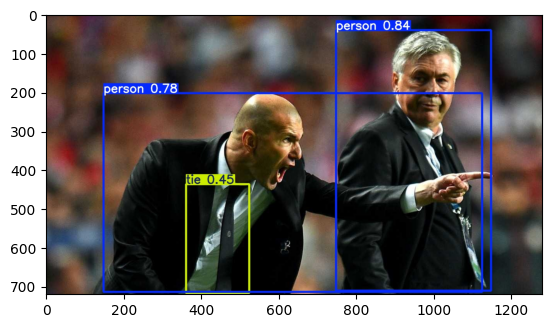

In [18]:
 plot_image("/content/runs/detect/predict/zidane.jpg")

In [11]:
# Load YOLO11n-seg, train it on COCO128-seg for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolo11n-seg.pt')  # load a pretrained YOLO segmentation model
model.train(data='coco8-seg.yaml', epochs=3)  # train the model
model('https://ultralytics.com/images/bus.jpg')  # predict on an image

100%|██████████| 5.90M/5.90M [00:00<00:00, 99.8MB/s]


Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=segment, mode=train, model=yolo11n-seg.pt, data=coco8-seg.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line

100%|██████████| 439k/439k [00:00<00:00, 16.0MB/s]
Unzipping /content/datasets/coco8-seg.zip to /content/datasets/coco8-seg...: 100%|██████████| 25/25 [00:00<00:00, 2625.38file/s]

Dataset download success ✅ (0.7s), saved to /content/datasets


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1 

 22                  -1  1    378880  ultralytics.nn.modules.block.C3k2            [384, 256, 1, True]           
 23        [16, 19, 22]  1    717680  ultralytics.nn.modules.head.Segment          [80, 32, 64, [64, 128, 256]]  
YOLO11n-seg summary: 355 layers, 2,876,848 parameters, 2,876,832 gradients, 10.5 GFLOPs

Transferred 561/561 items from pretrained weights
TensorBoard: Start with 'tensorboard --logdir runs/segment/train', view at http://localhost:6006/
Freezing layer 'model.23.dfl.conv.weight'


train: Scanning /content/datasets/coco8-seg/labels/train... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 2471.96it/s]

train: New cache created: /content/datasets/coco8-seg/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/coco8-seg/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 2392.64it/s]

val: New cache created: /content/datasets/coco8-seg/labels/val.cache
Plotting labels to runs/segment/train/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/segment/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G      1.346      3.029      3.568      1.635         21        640: 100%|██████████| 1/1 [00:06<00:00,  6.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]

                   all          4         17      0.798      0.902      0.942      0.683      0.739      0.843      0.851      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G     0.9366      2.533      2.457      1.209         33        640: 100%|██████████| 1/1 [00:05<00:00,  5.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.05s/it]

                   all          4         17       0.78      0.892       0.94      0.668      0.721      0.833      0.822      0.565



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G      1.104      3.086      2.577      1.204         29        640: 100%|██████████| 1/1 [00:06<00:00,  6.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.05s/it]

                   all          4         17      0.778      0.897       0.94      0.679      0.718      0.837      0.849      0.573



3 epochs completed in 0.011 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.1MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.1MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n-seg summary (fused): 265 layers, 2,868,664 parameters, 0 gradients, 10.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.60s/it]


                   all          4         17      0.798      0.901      0.942      0.683      0.739      0.843      0.851      0.569
                person          3         10      0.847      0.557      0.676      0.306      0.847      0.557      0.624      0.229
                   dog          1          1      0.734          1      0.995      0.895      0.734          1      0.995      0.895
                 horse          1          2       0.61          1      0.995      0.673       0.61          1      0.995      0.249
              elephant          1          2          1      0.851      0.995      0.334      0.649        0.5      0.501      0.253
              umbrella          1          1      0.669          1      0.995      0.995      0.669          1      0.995      0.895
          potted plant          1          1      0.927          1      0.995      0.895      0.927          1      0.995      0.895
Speed: 2.4ms preprocess, 327.9ms inference, 0.0ms loss, 2.3ms postpro

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 

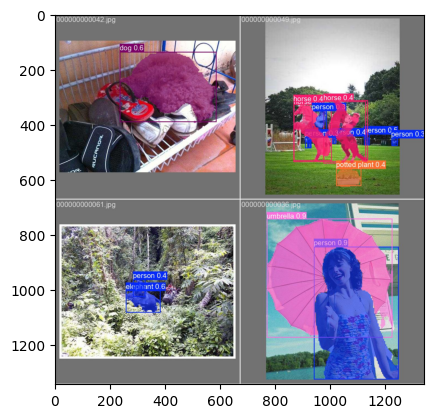

In [19]:
 plot_image("/content/runs/segment/train/val_batch0_pred.jpg")

In [12]:
# Load YOLO11n-pose, train it on COCO8-pose for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolo11n-pose.pt')  # load a pretrained YOLO pose model
model.train(data='coco8-pose.yaml', epochs=3)  # train the model
model('https://ultralytics.com/images/bus.jpg')  # predict on an image

100%|██████████| 5.97M/5.97M [00:00<00:00, 112MB/s]

Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=pose, mode=train, model=yolo11n-pose.pt, data=coco8-pose.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_


Dataset 'coco8-pose.yaml' images not found ⚠️, missing path '/content/datasets/coco8-pose/images/val'


100%|██████████| 334k/334k [00:00<00:00, 16.3MB/s]
Unzipping /content/datasets/coco8-pose.zip to /content/datasets/coco8-pose...: 100%|██████████| 27/27 [00:00<00:00, 3170.39file/s]

Dataset download success ✅ (0.7s), saved to /content/datasets

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, Tru

 23        [16, 19, 22]  1    715294  ultralytics.nn.modules.head.Pose             [1, [17, 3], [64, 128, 256]]  
YOLO11n-pose summary: 344 layers, 2,874,462 parameters, 2,874,446 gradients, 7.5 GFLOPs

Transferred 541/541 items from pretrained weights
TensorBoard: Start with 'tensorboard --logdir runs/pose/train', view at http://localhost:6006/
Freezing layer 'model.23.dfl.conv.weight'


train: Scanning /content/datasets/coco8-pose/labels/train... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 557.03it/s]

train: New cache created: /content/datasets/coco8-pose/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/coco8-pose/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 24174.66it/s]

val: New cache created: /content/datasets/coco8-pose/labels/val.cache
Plotting labels to runs/pose/train/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 87 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/pose/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G      1.296       3.32     0.3519       1.03      1.491          7        640: 100%|██████████| 1/1 [00:04<00:00,  4.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]

                   all          4         14      0.866      0.921      0.916      0.725          1      0.704      0.772       0.36



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G      1.089      3.564      0.388     0.9971      1.386         13        640: 100%|██████████| 1/1 [00:03<00:00,  3.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]

                   all          4         14      0.804      0.878      0.913      0.717          1      0.697      0.769      0.367



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G      1.107      4.171     0.4748     0.8395      1.105         17        640: 100%|██████████| 1/1 [00:03<00:00,  3.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.17s/it]

                   all          4         14      0.818      0.857      0.914      0.712          1      0.697      0.827       0.38



3 epochs completed in 0.008 hours.
Optimizer stripped from runs/pose/train/weights/last.pt, 6.1MB
Optimizer stripped from runs/pose/train/weights/best.pt, 6.1MB

Validating runs/pose/train/weights/best.pt...
Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n-pose summary (fused): 257 layers, 2,866,468 parameters, 0 gradients, 7.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.09s/it]


                   all          4         14      0.816      0.857      0.914      0.712          1      0.697      0.827       0.38
Speed: 2.2ms preprocess, 256.0ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/pose/train

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 4 persons, 202.2ms
Speed: 6.2ms preprocess, 202.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: ultralytics.engine.results.Keypoints object
 masks: None
 names: {0: 'person'}
 obb: None
 orig_img: array([[[119, 146, 172],
         [121, 148, 174],
         [122, 152, 177],
         ...,
         [161, 171, 188],
         [160, 170, 187],
         [160, 170, 187]],
 
        [[120, 147, 173],
         [122, 149, 175],
         [123, 153, 178],
         ...,
         [161, 171, 188],
         [160, 170, 187],
         [160, 170, 187]],
 
        [[123, 150, 176],
         [124, 151, 177],
         [125, 155, 180],
         ...,
         [161, 171, 188],
         [160, 170, 187],
         [160, 170, 187]],
 
        ...,
 
        [[183, 182, 186],
         [179, 178, 182],
         [180, 179, 183],
         ...,
         [121, 111, 117],
         [113, 103, 109],
         [115, 105, 111]],
 
        [[165, 164, 168],
         [173, 172, 176],
         [187, 186,

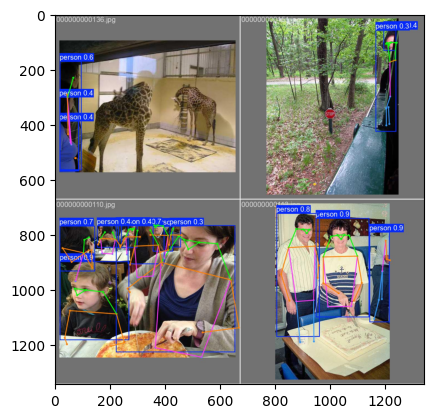

In [20]:
 plot_image("/content/runs/pose/train/val_batch0_pred.jpg")

In [13]:
# Load YOLO11n-obb, train it on DOTA8 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolo11n-obb.pt')  # load a pretrained YOLO OBB model
model.train(data='dota8.yaml', epochs=3)  # train the model
model('https://ultralytics.com/images/boats.jpg')  # predict on an image

100%|██████████| 5.53M/5.53M [00:00<00:00, 103MB/s]


Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=obb, mode=train, model=yolo11n-obb.pt, data=dota8.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=

100%|██████████| 1.24M/1.24M [00:00<00:00, 29.7MB/s]
Unzipping /content/datasets/dota8.zip to /content/datasets/dota8...: 100%|██████████| 27/27 [00:00<00:00, 881.88file/s]

Dataset download success ✅ (1.0s), saved to /content/datasets

Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, Tr

 11                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 12             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 13                  -1  1    111296  ultralytics.nn.modules.block.C3k2            [384, 128, 1, False]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 15             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 16                  -1  1     32096  ultralytics.nn.modules.block.C3k2            [256, 64, 1, False]           
 17                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
 18            [-1, 13]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 19                  -1  1     86720  ultralytics.nn.modules.block.C3k2            [192,

train: Scanning /content/datasets/dota8/labels/train... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 464.38it/s]

train: New cache created: /content/datasets/dota8/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/dota8/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 439.97it/s]

val: New cache created: /content/datasets/dota8/labels/val.cache
Plotting labels to runs/obb/train/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 87 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1024 train, 1024 val
Using 0 dataloader workers
Logging results to runs/obb/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G      0.826     0.4943        1.5         98       1024: 100%|██████████| 1/1 [00:13<00:00, 13.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.38s/it]

                   all          4          8      0.946          1      0.995      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G     0.7914     0.4972      1.378        218       1024: 100%|██████████| 1/1 [00:13<00:00, 13.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.83s/it]

                   all          4          8      0.948          1      0.995      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G     0.7736     0.5634      1.426        202       1024: 100%|██████████| 1/1 [00:13<00:00, 13.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.75s/it]

                   all          4          8      0.946          1      0.995      0.804



3 epochs completed in 0.021 hours.
Optimizer stripped from runs/obb/train/weights/last.pt, 6.1MB
Optimizer stripped from runs/obb/train/weights/best.pt, 6.1MB

Validating runs/obb/train/weights/best.pt...
Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n-obb summary (fused): 257 layers, 2,656,648 parameters, 0 gradients, 6.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.38s/it]


                   all          4          8      0.947          1      0.995      0.804
      baseball diamond          3          4      0.892          1      0.995      0.851
      basketball court          1          3      0.984          1      0.995      0.866
     soccer ball field          1          1      0.964          1      0.995      0.697
Speed: 5.6ms preprocess, 570.8ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/obb/train



100%|██████████| 190k/190k [00:00<00:00, 10.3MB/s]


image 1/1 /content/boats.jpg: 576x1024 530.1ms
Speed: 15.3ms preprocess, 530.1ms inference, 345.9ms postprocess per image at shape (1, 3, 576, 1024)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: None
 keypoints: None
 masks: None
 names: {0: 'plane', 1: 'ship', 2: 'storage tank', 3: 'baseball diamond', 4: 'tennis court', 5: 'basketball court', 6: 'ground track field', 7: 'harbor', 8: 'bridge', 9: 'large vehicle', 10: 'small vehicle', 11: 'helicopter', 12: 'roundabout', 13: 'soccer ball field', 14: 'swimming pool'}
 obb: ultralytics.engine.results.OBB object
 orig_img: array([[[ 40,  68, 103],
         [ 29,  56,  90],
         [ 14,  36,  64],
         ...,
         [ 86, 100,  94],
         [ 88, 102,  96],
         [ 92, 106, 100]],
 
        [[ 64,  95, 128],
         [ 54,  83, 114],
         [ 39,  66,  92],
         ...,
         [ 83,  97,  91],
         [ 82,  96,  90],
         [ 82,  96,  90]],
 
        [[ 77, 117, 142],
         [ 73, 111, 135],
         [ 69, 103, 126],
         ...,
         [ 62,  74,  68],
         [ 64,  78,  72],
         [ 65,  79,  73]],
 
        ...,
 
        [[ 62,  6

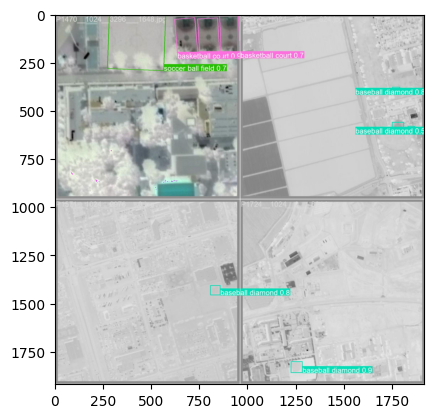

In [21]:
 plot_image("/content/runs/obb/train/val_batch0_pred.jpg")